### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2025 ###

# Optimized Meal Planning #

#### Keiji Toriumi (ktoriumi@wisc.edu), Myles Carpenter (mmcarpenter@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)

## 1. Introduction ##

Meal planning is a widespread issue for people all over the world. It is a difficult balance of getting enough nutrients, not wasting food, and spending as little money as possible. As someone planning how to buy ingredients for weekly grocery shopping, the question is what ingredients do you need to buy and what recipes should you make.

Given a set of recipes that you know and a set of ingredients that are available to buy from the grocery store, how can grocery shopping be optimized to save money. Given that a kitchen stores food from the past, constraints involving the amount of food that can be stored and how long it can be stored must be considered for a realistic model. A proper grocery shopping plan will also cover all necessary nutrients in a given week.

Important progress in this problem has been made in the past. George Stigler, an American economist, addressed the issue of how to minimize the cost of fulfilling all of a person's nutrition requirements given a list of food with known nutritional values (Stigler, 1945). This work was one of the earliest examples of an optimization problem. Stigler used a heuristic approach but developed the foundation for a problem that is solvable using modern optimization. This work is useful for people that go grocery shopping and wish to minimize the cost. It makes planning easier and more efficient.

Other researchers have modernized Stigler's work. Modern datasets and linear programming techniques gave more precise and thorough results (Garille, 2001). They have also extended the applicability of the data by performing the optimization with different circumstances for nutrition requirements. 

This work builds off of past work in fulfilling nutrition requirements using optimization techniques but also allows for meal planning across weeks, knowing that food can be stored in the fridge after being bought.

The model in this program will use a mix of synthetic and researched data. This model is highly customizable. Any recipes can be chosen but a set of recipes will be created by hand for the purpose of demonstration. Recipes will consist of fixed ratios of each ingredient in the database. These recipes will use real ingredients. We chose reasonable nutrition values(calories, carbs, protein, fats, fiber, vitamins, and minerals) based on information found at: (https://www.nutritionix.com/search?q=co). Estimates for required intake of each nutrient was found through searching Google. Initial prices will be chosen based on a snapshot of current prices as of 08/05/2025 from: (https://www.metromarket.net/). As grocery prices fluctuate, we synthetically generated randomly changing and roughly increasing weekly grocery prices. Reasonable estimates for volume taken up by each ingredient will be made by hand.

Some simplifying assumptions for our model are as follows: We assume a consumer knows all future grocery prices from the start. We assume that recipes can be made in arbitrarily fractional amounts. In the linear model, it is assumed that items can be bought at scalar quantities for the same unit price.

This report showcases two types of optimization models. The first model uses all linear variables. For example, if a recipe calls for 3.5 eggs, this model will output a suggestion of buying exactly 3.5 eggs. This model is limited for many people since they buy ingredients from grocery stores where ingredients are sold in predetermined quantities. To address this issue, this report also explores a mixed integer program (MIP) that restricts the buying of ingredients to predetermined quantities. 

## 2. Mathematical model ##

The multiperiod-planning linear program uses a linear variable for the amount of each ingredient to buy. This is not possible in most cases since food is usually sold in predetermined quantities. This means that the optimal solution given by the linear program is not necessarily practical. The strength of the linear program lies in its ability to specify exactly how much is needed in cases where it is possible to get a non-whole number quantity of an ingredient. Linear programs are also considered to have P complexity, making them less computationally expensive than the NP Complete MIP.

The data used in the linear program:

$$
\begin{aligned}
T, \text{the set of discrete time periods} \\
I, \text{the set of ingredients that are available} \\
N, \text{the set of nutrients that are tracked} \\
R, \text{the set of known recipes} \\
F_{in}, \text{the amount of nutrient } n \text{ per ounce of ingredient i},\ \forall i \in I,\ n \in N \\
S_{n}, \text{the amount of nutrient } n \text{ that is needed each week for a healthy diet} \\
C_{i}, \text{the unit cost in dollars per ounce of ingredient } i,\ \forall i \in I \\
Fr, \text{the max volume of the fridge in ounces} \\
Req_{ir}, \text{the required amount of ingredient i needed for a unit of recipe} \ r \ \forall i \in I, r \in R \\
\end{aligned}
$$

Decision variables:
- $x_{it}$, the number of ounces of ingredient i to buy in week t, $\forall i \in I, t \in T$
- $y_{rt}$, the amount of recipe $l$ to make in week k, $\forall r \in R, t \in T$
- $z_{it}$, the number of ounces of ingredient i to store in the fridge in week k, $\forall i \in I, t \in T$

The goal of this program is to minimize the total cost spent on grocery shopping. This corresponds to the sum of the amount of each ingredient bought multiplied by the unit cost of that ingredient.

The constraints appear in the program in the order that follows.

A key consideration of this program is fulfilling nutrient needs. The product of the amount of a recipe made, the unit amount of an ingredient needed in a recipe, and the unit amount of a nutrient in that ingredient represents the total amount of a nutrient given by a single ingredient in a single recipe.The sum of this product for all ingredients and every recipe is the total number of nutrients in a given week. The total number of nutrients must be greater than or equal to the required number of nutrients for every nutrient in every week.

As a multiperiod-planning problem, this program also involves storing food in a fridge to be used in later weeks. For practicality, the maximum volume of all ingredients in a given week that can be stored in the fridge is limited. This limit is recorded as Fr.

In order for this program to work, it is necessary to track the amount of each ingredient bought, consumed, and stored. First, it is important to establish the fact that at the start of the first week, the fridge is empty. The amount stored in the fridge is 0 for each ingredient.

After this is known, an ingredient balance can be calculated for each ingredient in each week. In each week, the amount of an ingredient available to use is the amount that was purchased and the amount that was stored in the fridge last week. Since ingredients cannot be created or destroyed, this must be exactly equal to the amount of the ingredient that was used for recipes and that was stored at the end of that week.

Finally, it is important to emphasize that negative quantities cannot be bought, consumed or sold.

The resulting multiperiod-planning linear program is as follows.

\begin{align}
\min \sum_{t \in T} \sum_{i \in I} x_{it} * C_i \\
\text{s.t. } \sum_{r \in R} \sum_{i \in I} y_{rt} * Req_{ir} * F_{in} \geq S_{n}, \forall t \in T, n \in N \\
\sum_{i \in I} z_{it} \leq Fr, \forall t \in T \\
z_{i0} = 0, \forall i \in I \\
x_{it} + z_{i,t-1} = \sum_{r \in R} y_{rt} * Req_{ir} + z_{it}, \forall t \in T, i \in I \\
y_{rt}, x_{it}, z_{it} \geq 0, \forall i \in I, t \in T
\end{align}

This linear program can be converted into standard form. This requires changing the min to a max and changing the equalities to less than or equal to inequalities.

\begin{align}
\max \sum_{t \in T} \sum_{i \in I} -x_{it} * C_i \\
\text{s.t. } S_{n} \leq \sum_{r \in R} \sum_{i \in I} y_{rt} * Req_{ir} * F_{in} , \forall t \in T, n \in N \\
\sum_{i \in I} z_{it} \leq Fr, \forall t \in T \\
z_{i0} \leq 0, \forall i \in I \\
-z_{i0} \leq 0, \forall i \in I \\
x_{it} + z_{i,t-1} - \sum_{r \in R} y_{rt} * Req_{ir} - z_{it}\leq 0, \forall t \in T, i \in I \\
-x_{it} - z_{i,t-1} + \sum_{r \in R} y_{rt} * Req_{ir} + z_{it}\leq 0, \forall t \in T, i \in I \\
y_{rt}, x_{it}, z_{it} \geq 0, \forall i \in I, t \in T
\end{align}

This multiperiod planning linear program can be converted into a multiperiod MIP. This will enable the user to choose ingredients based on predetermined sizes. The program remains the same except for three vital changes. First, the variable x is now a binary variable representing whether or not to buy an ingredient in a certain week. V is additional data needed for solving this problem. V is an array containing the volume of a single unit of an ingredient. Finally, C is changed. Rather than being a unit price, it is now the price of a single unit of an ingredient.

New data to add and change:

\begin{align}
V_i, \text{The volume in ounces of a unit of ingredient i}, \forall i \in I \\
C_i, \text{It now represents the cost of a unit of ingredient i}, \forall i \in I
\end{align}

Changed decision variable:

\begin{align}
x_{it}, \text{a binary variable, 1 if ingredient i is bought in week t, 0 otherwise} \forall i \in I, t \in T
\end{align}

Updated multiperiod planning MIP:

\begin{align}
\max \sum_{t \in T} \sum_{i \in I} -x_{it} * C_i \\
\text{s.t. } S_{n} \leq \sum_{r \in R} \sum_{i \in I} y_{rt} * Req_{ir} * F_{in} , \forall t \in T, n \in N \\
\sum_{i \in I} z_{it} \leq Fr, \forall t \in T \\
z_{i0} \leq 0, \forall i \in I \\
-z_{i0} \leq 0, \forall i \in I \\
x_{it}*V_{i} + z_{i,t-1} - \sum_{r \in R} y_{rt} * Req_{ir} - z_{it}\leq 0, \forall t \in T, i \in I \\
-x_{it}*V_i - z_{i,t-1} + \sum_{r \in R} y_{rt} * Req_{ir} + z_{it}\leq 0, \forall t \in T, i \in I \\
y_{rt}, z_{it} \geq 0, \forall i \in I, t \in T \\
x \text{ is a binary variable}
\end{align}

## 3. Solution ##

## Data formulation

Define the common dataset that will be used.

In [87]:
# Define the data
using NamedArrays

T_end = 10 # Number of weeks
T = 1:T_end # Set of weeks
FR_CAP = 700 # Fridge capacity limit in oz.

N = [:calories, :protein, :fiber, :carbs, :fat, :vitamins, :minerals] # Nutrient set

        # nutrition requirements according to Google for average sized adult male
        # calories: 2000 kcals
        # protein: 55 g (bhf.org.uk)
        # fiber: 40 g (health.harvard.edu)
        # carbs: 130 g (mayoclinic.org)
        # fat:50 g (mayoclinic.org)
        # vitamins: artificially chosen
        # minerals: artificially chosen
S = NamedArray([14000, 385, 280, 700, 70, 140, 140], N, "Nutrient Requirements") # Weekly nutrition requirements

# INGREDIENT DATA
I = [:rice, :chicken, :steak, :noodles, :cream, :tomato, :asparagus, :bread, :tofu, :banana, :yogurt, :cereal] # Ingredient Set

# Cost of an ingredient in dollars / oz
Cinit = NamedArray([.1, .375, .9375, .08, .30, .1369, .2369, .16, .14, .0431, .20, .36], I, "Ingredients") 

# NUTRIENT DATA
# amount of nutrient per volume of ingredient [nutrient / oz]
F = NamedArray([37 .76 .11 8 .08 1 1;
        47 8.8 0 0 1 .25 3;
        53 8.3 0 0 2.2 .25 3.5;
        45 1.6 .51 8.7 .26 0 .5;
        96 .81 0 .81 10.2 1 1;
        5 .25 .34 1.1 .06 3 1.5;
        6 .62 .6 1.1 .03 2 2;
        76 2.5 .77 14 .95 0 1.5;
        41 4.9 .65 .79 2.5 1 3;
        25 .31 .74 6.5 .09 1.5 3.5;
        17 .98 0 1.3 .92 .5 1.25;
        92 2.2 3.9 22.4 .45 .75 3;
        ], (I, N), ("Ingredients", "Nutrients"))

# RECIPE DATA
R = [:steak_rice_asparagus, :chicken_ceasar_salad, :chicken_marinara, 
    :steak_alfredo, :banana_toast, :overnight_oats, :stirfried_tofu, :clamless_chowder, :CLT]

# Required ratio of ingredients in each recipe
Req = NamedArray([  5 0 3 0 0 0 3 0 0 0 0 0; # steak rice aspargus
                    0 3 0 0 0 2 2 0 0 0 1 0; # chicken ceasar salad
                    0 2 0 5 0 3 0 0 0 0 0 0; # chicken marinara
                    0 0 3 5 2 0 0 0 0 0 0 0; # streak alfredo
                    0 0 0 0 0 0 0 1 0 1 0 0; # banana toast
                    0 0 0 0 0 0 0 0 0 1 1 3; # overnight oats
                    1 0 0 0 0 0 1 0 1 0 0 0; # stirfried tofu
                    0 1 0 0 3 0 0 1 0 0 0 0; # clamless chowder
                    0 1 0 0 0 1 0 1 0 0 0 0; # chicken lettuce tomato
                    ],
                    (R, I), ("Recipes", "Ingredients")) 

;

### Static costs

Linear, multi-period planning model with fixed weekly costs.

In [88]:
using Plots

C = NamedArray(zeros(Float64, length(T), length(I)), (T, I), ("Week", "Ingredients"))

# set the cost to be the same in every week
for i in 1:length(I), t in 1:length(T)
    C[t, i] = Cinit[i]
end

# make the model according to the linear program
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[T, I] >= 0)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( (x[t, i])  for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * Cinit[i] for i in I, t in T ))

set_silent(m)
optimize!(m)

# save the results for later comparison
ingredient_values = NamedArray( [ (value(x[t, i])) for t in T, i in I ], (T, I), ("Ingredients", "Week"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Recipes", "Week"))

plot_MODEL1_weekly_costs = plot(permutedims(String.(I)), permutedims(Cinit), xlabel="Ingredient", ylabel="(\$/oz)", ylims=(0, 1), markershape=:circle, legend=false, seriestype=:scatter)
plot_MODEL1_ingredients_bought = plot(T, ingredient_values, xlabel="Time (week)", ylabel="Quantity Bought (oz)" , label=permutedims(String.(I)))
plot_MODEL1_recipes_cooked = plot(T, recipe_values, xlabel="Time (week)", ylabel="Quantity Recipe Cooked (portion)" , label=permutedims(String.(R)))
objval_MODEL1 = objective_value(m)
;

### Randomly Changing Weekly Costs Seed 1

Linear multi-period planning model with roughly increasing weekly costs. 

In [89]:
using Random

Random.seed!(299)

# define roughly increasing weekly costs using Random
C = NamedArray(zeros(Float64, length(T), length(I)), (T, I), ("Week", "Ingredients"))

UNCERTAINTY = .0324
UNIT_COST_INCREASE = .0215 # https://www.bls.gov/cpi/tables/variance-estimates/
                           # 2024 CPI Variance Estimates 
                           # 2.21% / 52 / 7 ~= .0215 - average weekly inflation of food at home items in 2024
                           # .18^2 = .0324 - variance of sample in this study

# set the starting value
for i in 1:length(I)
    C[1, i] = Cinit[i]
end

# adjust it for random increase due to inflation
for t in 2:length(T)
    for i in 1:length(I)
        C[t, i] = C[t - 1, i] + UNCERTAINTY * Random.rand(-1:1) + UNIT_COST_INCREASE * C[t - 1, i]
        if C[t, i] <= .01
            C[t, i] = .05
        end
    end
end

# make the model
m = Model(HiGHS.Optimizer)

@variable(m, x[T, I] >= 0)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( (x[t, i])  for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * C[t, i] for i in I, t in T ))

set_silent(m)
optimize!(m)

# save the results for later comparison
ingredient_values = NamedArray( [ (value(x[t, i])) for t in T, i in I ], (T, I), ("Ingredients", "Week"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Recipes", "Week"))

plot_MODEL2_weekly_costs = plot(T, C, xlabel="Time (week)", ylabel="Cost (\$/oz)" , label=permutedims(String.(I)))
plot_MODEL2_ingredients_bought = plot(T, ingredient_values, xlabel="Time (week)", ylabel="Quantity Bought (oz)" , label=permutedims(String.(I)))
plot_MODEL2_recipes_cooked = plot(T, recipe_values, xlabel="Week", ylabel="Quantity Recipe Cooked (portion)" , label=permutedims(String.(R)))
objval_MODEL2 = objective_value(m)
;

### Randomly Changing Weekly Costs Seed 2

Linear multi-period planning model with roughly increasing weekly costs. 

In [90]:
# use a different seed
Random.seed!(305)

C = NamedArray(zeros(Float64, length(T), length(I)), (T, I), ("Week", "Ingredients"))

# define roughly increasing weekly costs
for i in 1:length(I)
    C[1, i] = Cinit[i]
end

for t in 2:length(T)
    for i in 1:length(I)
        C[t, i] = C[t - 1, i] + UNCERTAINTY * Random.rand(-1:1) + .005 * C[t - 1, i]
        if C[t, i] <= .01
            C[t, i] = .05
        end
    end
end

# make the model
m = Model(HiGHS.Optimizer)

@variable(m, x[T, I] >= 0)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( (x[t, i])  for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * C[t, i] for i in I, t in T ))

set_silent(m)
optimize!(m)

ingredient_values = NamedArray( [ (value(x[t, i])) for t in T, i in I ], (T, I), ("Ingredients", "Week"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Recipes", "Week"))

# save results for later
plot_MODEL3_weekly_costs = plot(T, C, xlabel="Time (week)", ylabel="Cost (\$/oz)" , label=permutedims(String.(I)))
plot_MODEL3_ingredients_bought = plot(T, ingredient_values, xlabel="Time (week)", ylabel="Quantity Bought (oz)" , label=permutedims(String.(I)))
plot_MODEL3_recipes_cooked = plot(T, recipe_values, xlabel="Time (week)", ylabel="Quantity Recipe Cooked (portion)" , label=permutedims(String.(R)))
objval_MODEL3 = objective_value(m)
;

The MIP uses the same data as the linear program in order to compare the results. This block of code for the MIP cannot be run on a CPU. However, it does run and quickly return a result when run on a GPU, courtesy of Google Colab. The block of code is commented out for clarity.

In [91]:
#=
# two new data arrays are needed

# 1.C init is now the cost of a single pack of the ingredient - from metromarket.com
Cinit = [2, 13, 19, 1.3, 10, 3.8, 6.5, 1.9, 2, 1.6, 1.5, 6.3] # dollars

# 2. the cost is accompanied by a volume corresponding to the size of that package - from metromarket.com
V = NamedArray([32, 80, 10, 16, 32, 10, 12, 20, 16, 4, 4.4, 15.4], # oz
                I, "Ingredients")

m = Model(HiGHS.Optimizer)

@variable(m, x[T, I], Bin)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( x[t, i]*V[i] for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i]*V[i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i]*V[i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * C[t, i] for i in I, t in T ))

set_silent(m)
optimize!(m)

ingredient_values = NamedArray( [ (value(x[t,i])) for t in T, i in I ], (T, I), ("Week", "Ingredients"))
recipe_values = NamedArray( [ (value(y[t,r])) for t in T, r in R ], (T, R), ("Week", "Recipes"))
fridge_values = NamedArray( [ (value(z[t,i])) for t in T, i in I ], (T, I), ("Week", "Stored"))

println("Cost Matrix")
println(C)
println()

p1 = plot(1:10, C, xlabel="Week", ylabel="Cost" , label=permutedims(String.(I)))
display(p1)
println()

println("What ingredients to buy in each week")
display(ingredient_values)
println()

p2 = plot(1:10, ingredient_values, xlabel="Week", ylabel="Ingredient bought?" , label=permutedims(String.(I)))
display(p2)
println()

println("Recipes cooked per week")
display(recipe_values)
println()

p3 = plot(1:10, recipe_values, xlabel="Week", ylabel="Quantity of Recipe Cooked" , label=permutedims(String.(R)))
display(p3)
println()

println("How much of each ingredient to store each week")
display(fridge_values)
println()

p4 = plot(1:10, fridge_values, xlabel="Week", ylabel="Quantity Stored" , label=permutedims(String.(I)))
display(p4)
println()

println("Total cost ", objective_value(m))

=#

To compare computational complexity, also consider the same MIP with a smaller dataset. Now, only use three ingredients, two recipes, and two nutrients.

In [92]:
T_end = 10
T = 1:T_end
FR_CAP = 100

I = [:rice, :chicken_nuggets, :steak]
N = [:calories, :protein]
R = [:steak_and_rice, :just_nuggets]
Req = NamedArray([5 0 3; 0 10 0], (R, I), ("Recipes", "Ingredients")) 
F = NamedArray([300 0; 200 5; 400 30], (I, N), ("Ingredients", "Nutrients"))
S = NamedArray([2000, 100], N, "Nutrient Requirements")
C = NamedArray([5 5 15; 5 5 15; 5 5 15; 5 5 15; 5 5 15;
    5 5 15; 5 5 15; 5 5 15; 5 5 15; 5 5 15;],
    (T, I), ("Week", "Ingredients"))
V = NamedArray([20, 20, 40], I, "Volume")

# make the model
m = Model(HiGHS.Optimizer)

@variable(m, x[T, I], Bin)
@variable(m, y[T, R] >= 0)
@variable(m, z[T, I] >= 0)

@constraint(m, nutr_satisfied[n in N, t in T],
    sum(y[t, r] * sum(Req[r, i] * F[i, n] for i in I) for r in R) >= S[n])

@constraint(m, fridge_capacity[t in T], sum( x[t, i]*V[i] for i in I ) <= FR_CAP)

@constraint(m, first_ingredient_bal[i in I], x[1, i]*V[i] == sum( y[1,r] * Req[r,i] for r in R) + z[1, i])

@constraint(m, ingredient_bal[t in 2:T_end, i in I], x[t, i]*V[i] + z[t-1, i] == sum( y[t,r] * Req[r,i] for r in R) + z[t, i])

@objective(m, Min, sum( x[t, i] * C[t, i] for i in I, t in T ))

set_silent(m)
optimize!(m)

ingredient_values = NamedArray( [ (value(x[t,i])) for i in I, t in T ], (I, T), ("Ingredients", "Week"))
recipe_values = NamedArray( [ (value(y[t,r])) for r in R, t in T ], (R, T), ("Recipes", "Week"))
fridge_values = NamedArray( [ (value(z[t,i])) for i in I, t in T ], (I, T), ("Stored", "Week"))

println("What ingredients to buy in each week")
display(ingredient_values)
println()

println("Recipes cooked per week")
display(recipe_values)
println()

println("How much of each ingredient to store each week")
display(fridge_values)
println()

println("Total cost ", objective_value(m))

What ingredients to buy in each week


3×10 Named Matrix{Float64}
Ingredients ╲ Week │   1    2    3    4    5    6    7    8    9   10
───────────────────┼─────────────────────────────────────────────────
rice               │ 1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
chicken_nuggets    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
steak              │ 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


Recipes cooked per week


2×10 Named Matrix{Float64}
Recipes ╲ Week │       1        2        3  …        8        9       10
───────────────┼────────────────────────────────────────────────────────
steak_and_rice │ 1.11111  1.11111  1.11111  …  1.11111  1.11111  1.11111
just_nuggets   │     0.0      0.0      0.0  …      0.0      0.0      0.0


How much of each ingredient to store each week


3×10 Named Matrix{Float64}
  Stored ╲ Week │       1        2        3  …        8        9       10
────────────────┼────────────────────────────────────────────────────────
rice            │ 14.4444  8.88889  23.3333  …  15.5556     10.0  4.44444
chicken_nuggets │     0.0      0.0      0.0         0.0      0.0      0.0
steak           │ 36.6667  33.3333     30.0  …  13.3333     10.0  6.66667


Total cost 30.0


## 4. Results and discussion ##

### Linear Multi-Period Planning Program Results

**The following section contains discussion on the results of our linear programs.**

Each section contains three plots and the objective value. The first plot will contain the ingredient cost data we used. The second will show the optimal weekly quantity of ingredients bought. The third and final plot will show the optimal quantity of recipes to cook per week.

First, we will discuss the result of running the linear program with a static cost, that is a cost that does not change with respect to time. The final two examples are the results of running the program with increasing costs over time. We used researched data to formulate the cost function; each week, the cost of goods is increased by the 2024 average weekly inflation rate plus the average variance of the 2024 sample.

#### Static Example

![results/staticplot1.png](results/staticplot1.png)

The first plot illustrates the cost data used for the program.

The second plot illustrates the quantity bought ($x_{i, j}$) decision variable values obtained running the problem. We see a large initial banana purchase which crashes and levels off towards the end, as well as a handful of constant weekly ingredient purchases. From this result, as well as the following results, we see that a shopper is incentivized by our model to by a large amount of the best value ingredient at the beginning. Any time the weekly purchase flattens, we see the refrigerator constraint in action. Without the refrigerator constraint, the shopper could buy as many ingredients as they want at any time. To avoid, the possibly unrealistic large banana spike at the beginning, it would make sense in a future model to associate expiration dates with each of the ingredients. A simpler method could be to associate a positive cost with storing items in the refrigerator. While this method is not directly rooted in real-world data, tweaking this tradeoff cost could more accurately model the Meal Planning Optimization Problem.

![results/staticplot2.png](results/staticplot2.png)

The third and final plot illustrates the optimal quanitity of recipes to buy per week ($y_{i, j}$). We see that the same recipes are prepared at the same rate each week, around 120 units of banana toast and around 10 weekly units of Chicken, Lettuce, Tomato. This is because the costs of goods never change. In an ideal and culinarily boring world, maybe it would be optimal to cook the same foods each week. We sought to improve the data set by increasing the food costs weekly with respect to 2024 inflation data.

The optimal cost of grocery shopping for 10 weeks according to this static model is: $\text{\$}345.39$ at a unit rate of $\text{\$}34.54$ per week. Compared to our personal grocery budgets, this seems like a accurate real-world model. That said, a diet of strictly banana toast and occaional chicken/lettuce/tomato sounds quite bland and conservative.

#### Increasing Weekly Grocery costs (seed 1)

![](results/randomseed1plot1.png)

Compared to the static example, the first plot shows the impact inflation can have on cost data. Though the generation of gradually increasing food costs seems to be more accurate than costs staying static, it may be unrealistic to assume a shopper can have full knowledge of future grocery costs. Using past data, however, is about the best we can do to predict the future.

In plot 2, we see a large spike of cereal and banana purchases in week 1, 2-3 times larger spikes of bread and banana purchases in week 2 and 3 respectively, and smaller peaks for larger values of $t$ (week). Similar to our static analysis, this behavior can be explained as follows. Shoppers wish to buy ingredients at a cheap as possible rate but are constrained by fridge space. They fill their fridge up with high-value ingredients at low values of $t$ when ingredient costs are likely the lowest. When those ingredients run out, the shopper will have to replenish the fridge at the next best price, exhibited by the smaller peaks later in the plot.

![](results/randomseed1plot2.png)

In the final recipe plot, we see that the recipes cooked remains constant each week, with very similar quantities of banana toast and CLT prepared.

The objective value for 10 weeks of grocery clocks in at $\text{\$}325.63$, a unit cost of $\text{\$}32.56$ per week.

#### Increasing Weekly Grocery costs (seed 2)

![](results/randomseed2plot1.png)

The quantity purchased data above features more interspersed weekly banana toast buying spikes. We believe this is indicative of lower periods of price inflation causing it to be advantageous to buy ingredients gradual over the weeks. Quick note: because the first weekly cost is constant across seeds each graph starts with the same amount of ingredient bought in week 1.

![](results/randomseed2plot2.png)

In the recipes plot, we see banana toast was able to dominate the shopper's diet completely, bringing all other quantities of recipes cooked to 0. Likely, the inflation of other ingredient costs made it sub-optimal to cook any other recipe. 

The objective value, in this case, is $\text{\$}192.87$ with a weekly unit cost of $\text{\$}19.29$. This value seems like an outlier compared to the other dataset constructions/seeds. The linear multi-period planning model implementations show us that the optimal diet seems to be boring, bland, nutritious, and cheap. We are glad to find that the objective values after multiple runs generally fall in liine with our real-world budget expectations. Lastly, if a reader takes one thing away, it should be that banana toast rules all.

### Mixed Integer Program Results

The MIP reported a total cost of 147.15 dollars when using randomly changing prices for a 10 week period. This program was not feasible to run on a CPU. Unlike the linear programs which all ran in reasonable times, the MIP gave no feedback after 10 minutes. However, when connecting to a GPU through Google Colab, the MIP ran in reasonable time and produced the results shown.

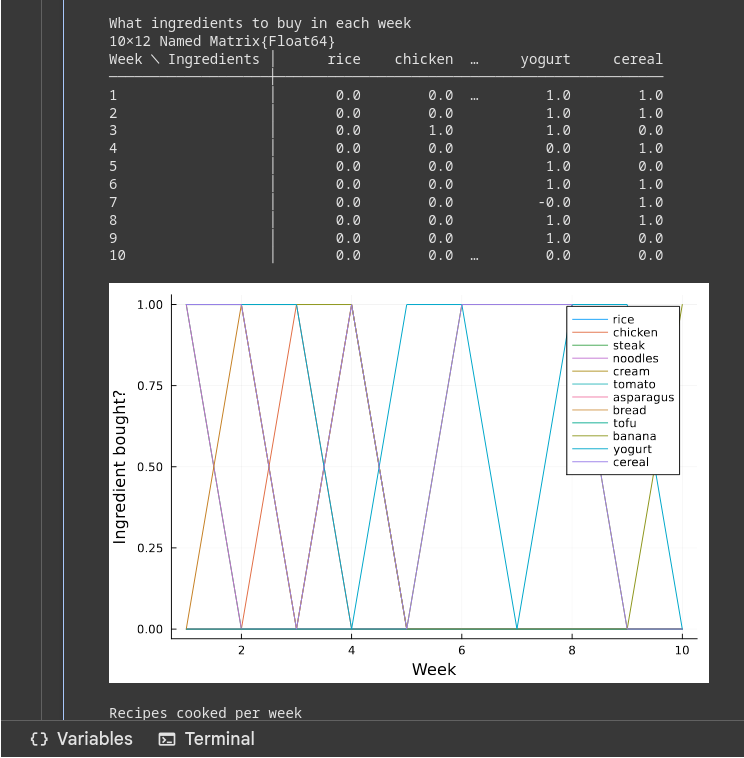

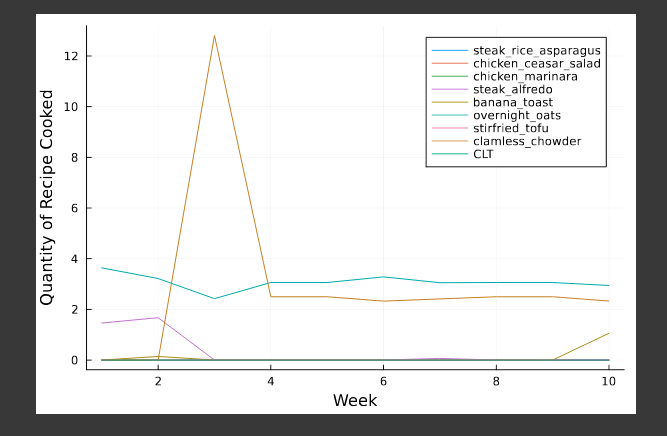

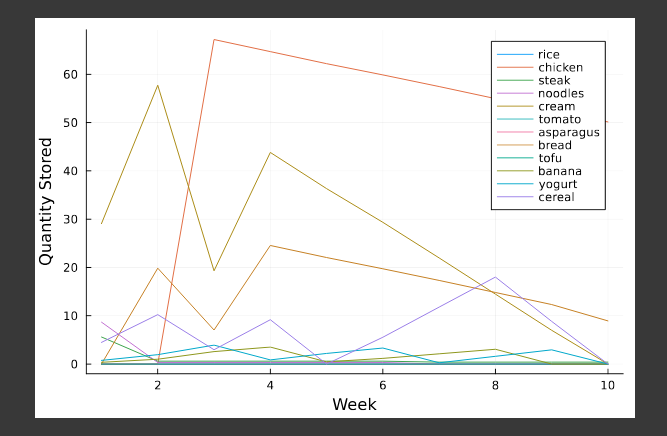

These results are meaningful when compared to an integer program with a modified dataset. When using three ingredients, two recipes, and two nutrients, the MIP returned results within a few seconds on a CPU. This contrasts with the larger dataset of twelve ingredients and nine recipes that did not make any output to the console. This suggests that this MIP formulation has a poor time complexity. Increasing the number of variables significantly increased the computation time, much more than a proportional time increase. This was the output of the MIP with a smaller dataset.

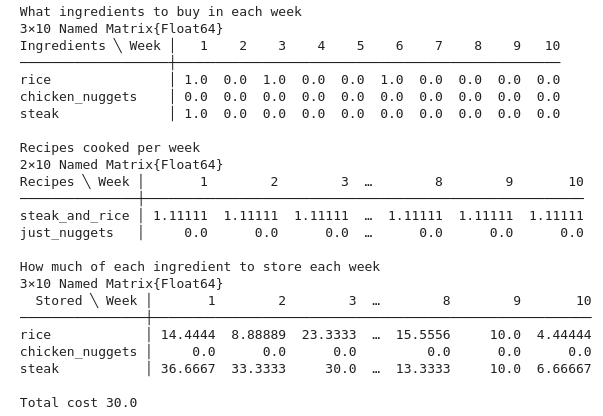

## COMPARE THE MIP TO THE LINEAR PROGRAM ##

### 4.A. Feel free to add subsections

**Issues/Concerns**
1. It may make sense to add a tradeoff variable. The MAX recipes per week variable is a constraint that could be itself optimized. Same thing for the recipes. Substituting ingredients and tweaking the proportions are realistic things a cook do to account for dietary restrictions, ingredient scarcity, flavor preference, etc.
2. Ingredient costs may fluctuate over time. It may make sense to further complicate the data and change $C_i$ to $C_{ik} \ (i \in I, k \in T)$
3. Assuming 3 is implemented, it is not realistic to know every future price fluctuation in advance. Therefore it makes more sense to create a model that is blind to future conditions.
4. There are conceivable situations where there is no solutions(for example, a vegan may struggle to reach protien nutrient constraint if there is a lack of special ingredients in the market)

**Possible Approaches for concerns**
1. This seems like less of a priority for our project than other issues, but I think this would be useful for an end user using our model.

2. As we move on to generating data with scripts rather that hand-typing, we will see how cost-change over time makes data-creation more complex.

3. This seems like a possible application of stochastic programming, which I know almost nothing about and may be beyond the scope of this class. I wonder if there is a way to force the model to only consider only the next $t \leq |T|$ time slices, using only constraints.

4. We can use least-squares techniques to find the diet that gets someone as close to the nutrient requirements as possible.

#### PLOTS

##### Static Cost Multi-Period Programming Model

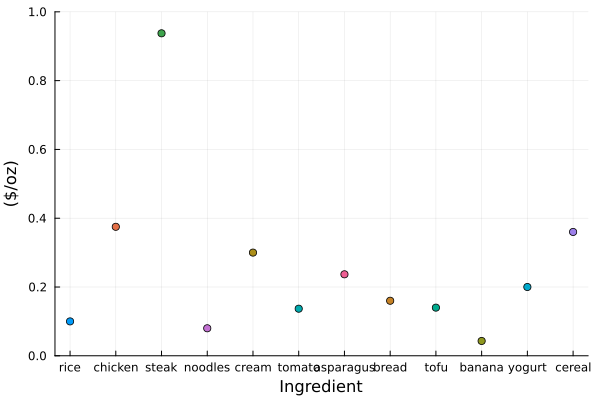

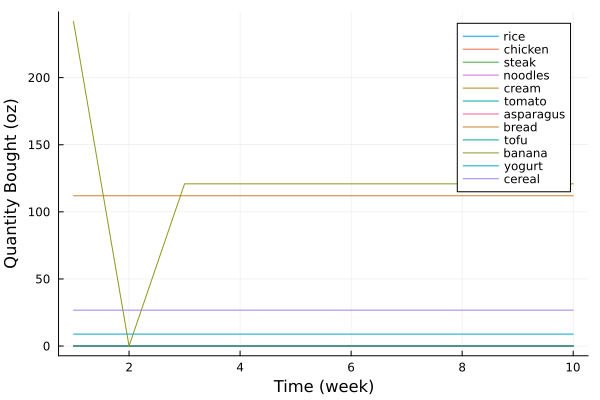

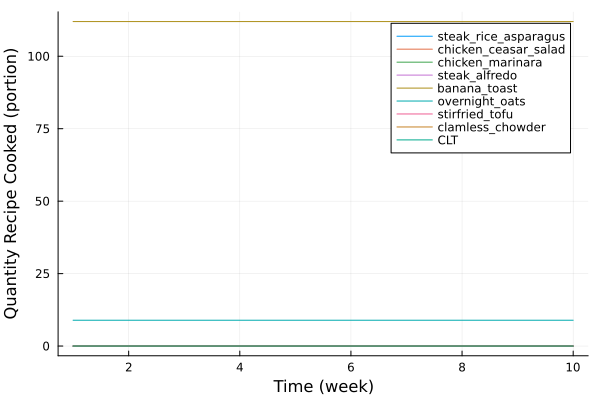

Optimal Cost: $345.39

In [93]:
using Printf

display(plot_MODEL1_weekly_costs)

display(plot_MODEL1_ingredients_bought)

display(plot_MODEL1_recipes_cooked)

@printf("%s%0.2f", "Optimal Cost: \$", round(objval_MODEL1, digits=2))

##### Randomly Changing Weekly Costs Seed 1


Weekly Costs:


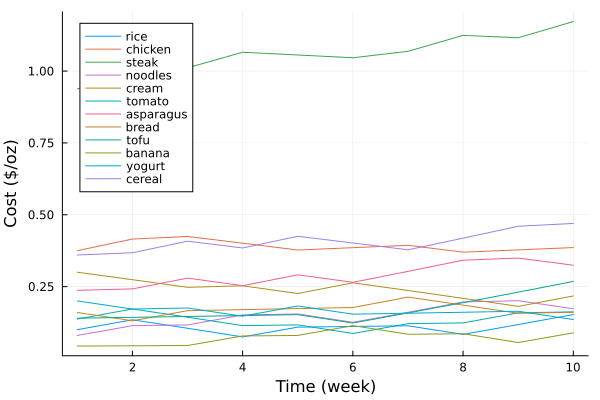

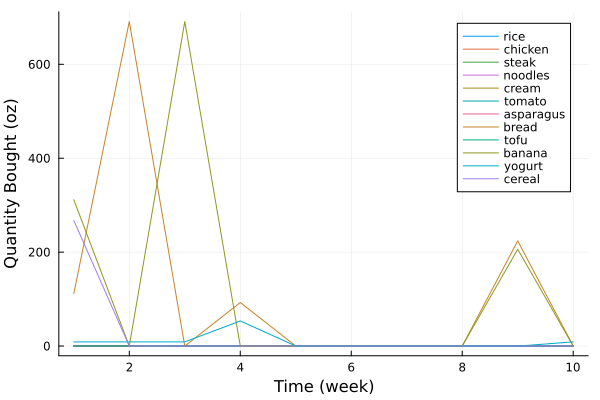

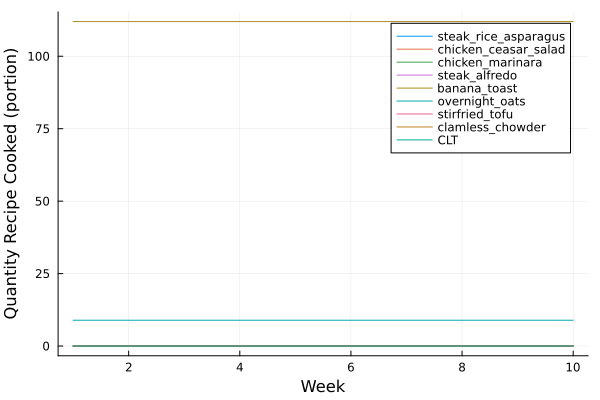

Optimal Cost: $325.63

In [94]:
println()
println("Weekly Costs:")
display(plot_MODEL2_weekly_costs)

display(plot_MODEL2_ingredients_bought)

display(plot_MODEL2_recipes_cooked)

@printf("%s%0.2f", "Optimal Cost: \$", round(objval_MODEL2, digits=2))

##### Randomly Changing Weekly Costs Seed 2


Weekly Costs:


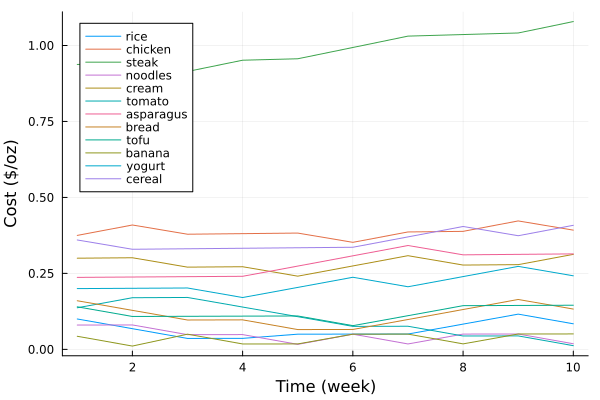

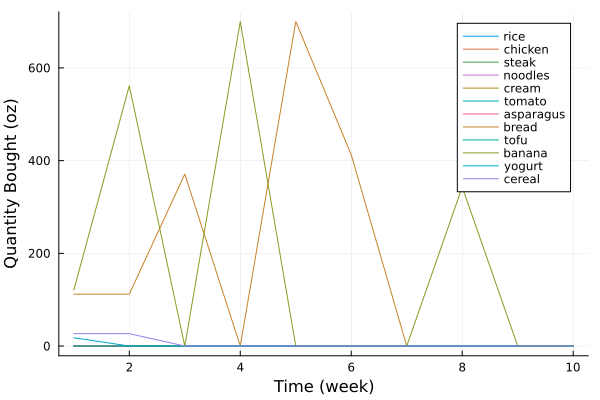

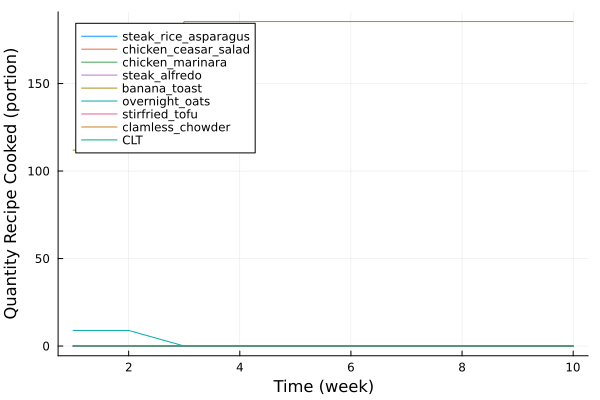

Optimal Cost: $192.87

In [95]:
println()
println("Weekly Costs:")
display(plot_MODEL3_weekly_costs)

display(plot_MODEL3_ingredients_bought)

display(plot_MODEL3_recipes_cooked)

@printf("%s%0.2f", "Optimal Cost: \$", round(objval_MODEL3, digits=2))

## 6. Conclusion ##

From the results we gathered, our models are very sensitive to changes in price. Initial dives into future work should certainly look into making the generation of cost model more accurate, especially over time. Our model does adapt well to price fluctuations. Our model is also general, in that it can be used with or without future price fluctuations in mind. All that being said, the objective values found fall in line with our original assumptions on a reasonable grocery budget. The linear models decide an incredibly boring diet of bananas and bread, with occasional chicken to fill in the protein deficit. One innacurracy in our data could come from the arbitrary way we chose recipes. Though different foods have nutritional profiles standardized by our government, recipes are far less standardized. Future efforts should also be done to formalize the concept of a recipe and recipes' associated data.

There are distinct issues that can be addressed in the future for both the linear program and the mixed integer problem. The linear program has the potential of finding cooking impractical amounts of recipes to be optimal. For example, there are no constraints stopping it from using every recipe in every week and quantities of those recipes that are nearly zero. Although, this problem does not appear in the results using this dataset it is a potentially important consideration for the future. One option is to convert the linear program into a MIP with an additional binary variable that indicates whether an ingredient is to be used or not. This variable could be set to only become one beyond a certain threshold of the amount of recipe to make. This MIP may not necessarily perform as poorly as the MIP in this report since it has a different structure.

Another potential area to study in the future involves the end behavior of the program. There are some cases where it makes more recipes than are required and others where it leaves some leftover food stored in the fridge. In terms of modeling, this makes sense. There is no benefit for the linear program to make more food in a week than is necessary to fulfill the requirements, nor is there a reason not to store more food in the fridge. This suggests that either option is optional. A future direction could be to manage this end of program behavior. Ideally, food should not be wasted and each week should have a similar amount of food consumed. There is no clear single solution to this issue. One possibility is to limit the total amount of food that can be bought, cooked, or stored in a week. This would limit large spikes in any given week. 

## 7. References ##

George J. Stigler, (1945), Journal of Farm Economics. Vol. 27, No. 2, pp. 303-314, Oxford University Press
https://doi.org/10.2307/1231810

Susan Garner Garille, Saul I. Gass, (2001) Stigler's Diet Problem Revisited. Operations Research 49(1):1-13.
https://doi.org/10.1287/opre.49.1.1.11187